In [ ]:
from google.colab import files
uploaded = files.upload()


Saving distribuicao_regional_X_publico_alvo.xlsx to distribuicao_regional_X_publico_alvo.xlsx


In [ ]:
import pandas as pd
import os

# Confirma se o arquivo tá mesmo na pasta
file_path = '/content/distribuicao_regional_X_publico_alvo.xlsx'
print("Arquivos na pasta /content:", os.listdir('/content'))  # Deve mostrar o arquivo

# Nome da aba (com espaço, cuidado com isso)
sheet_name = 'distribuição_regional _X_public'

# Tenta carregar o Excel
try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print("Arquivo carregado com sucesso!")
except Exception as e:
    print(f"Deu ruim: {e}")
    # Se der erro na aba, lista as abas disponíveis
    xl = pd.ExcelFile(file_path)
    print("Abas disponíveis no arquivo:", xl.sheet_names)
    raise  # Levanta o erro pra tu ver o que rolou

# Remove a linha de total
df = df[df['Região'] != 'TOTAL (0 a 9 anos)']

# Converte colunas pra numérico
cols_num = [
    'Internações', 'Óbitos', 'Taxa mortalidade', 'Valor médio intern',
    'Média permanência'
]
for col in cols_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Mostra as primeiras linhas
print("\nPrimeiras 5 linhas do DataFrame:")
print(df.head())

# Confirma as colunas pra evitar surpresas
print("\nColunas do DataFrame:")
print(df.columns)

Arquivos na pasta /content: ['.config', '.ipynb_checkpoints', 'distribuicao_regional_X_publico_alvo.xlsx', 'sample_data']
Arquivo carregado com sucesso!

Primeiras 5 linhas do DataFrame:
         Região  Internações  AIH aprovadas   Valor total  Val serv hosp  \
0         Norte       138373         138382  1.645806e+08   1.242922e+08   
1      Nordeste       432171         435389  6.441850e+08   4.798278e+08   
2       Sudeste       652844         660784  1.187894e+09   9.080260e+08   
3           Sul       294078         297026  5.890831e+08   4.373716e+08   
4  Centro-Oeste       135287         137684  2.106319e+08   1.590756e+08   

   Val hosp comp fed  Val hosp comp gest  Valor serv prof  Val prof comp fed  \
0         3464215.03              713.03     3.508493e+07             713.03   
1        21660381.85           382327.24     1.295434e+08          382327.24   
2        38115514.19           174695.84     2.216579e+08          174695.84   
3        27571951.96            2109

In [ ]:
import pandas as pd

file_path = 'distribuicao_regional_X_publico_alvo.xlsx'  # Use o nome exato do arquivo após upload
sheet_name = 'distribuição_regional _X_public'            # Nome exato da aba

df = pd.read_excel(file_path, sheet_name=sheet_name)

# Remove linha de total
df = df[df['Região'] != 'TOTAL (0 a 9 anos)']

# Converte colunas numéricas (caso estejam como string)
cols_num = [
    'Internações', 'Óbitos', 'Taxa mortalidade', 'Valor médio intern',
    'Média permanência'
]
for col in cols_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()


,Região,Internações,AIH aprovadas,Valor total,Val serv hosp,Val hosp comp fed,Val hosp comp gest,Valor serv prof,Val prof comp fed,Val prof comp gest,Valor médio AIH,Valor médio intern,Dias permanência,Média permanência,Óbitos,Taxa mortalidade,Taxa internação
0,Norte,138373,138382,1.645806e+08,1.242922e+08,3464215.03,713.03,3.508493e+07,713.03,8460.93,1189.40,1189.48,645328,4.7,1102,0.79,4.61
1,Nordeste,432171,435389,6.441850e+08,4.798278e+08,21660381.85,382327.24,1.295434e+08,382327.24,233141.48,1480.45,1491.15,2298056,5.1,4726,1.09,5.64
2,Sudeste,652844,660784,1.187894e+09,9.080260e+08,38115514.19,174695.84,2.216579e+08,174695.84,669425.93,1798.59,1821.06,3509790,5.2,9335,1.42,6.13
3,Sul,294078,297026,5.890831e+08,4.373716e+08,27571951.96,21091.74,1.173560e+08,21091.74,11441.34,1983.27,2001.91,1452140,4.8,3681,1.25,7.63
4,Centro-Oeste,135287,137684,2.106319e+08,1.590756e+08,2241438.98,558046.39,3.923082e+07,558046.39,161987.06,1474.23,1492.61,647634,4.8,1303,0.96,5.69


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12})


<ipython-input-62-b0cc7d668211>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Região', y='Taxa mortalidade', data=df, palette='Reds')


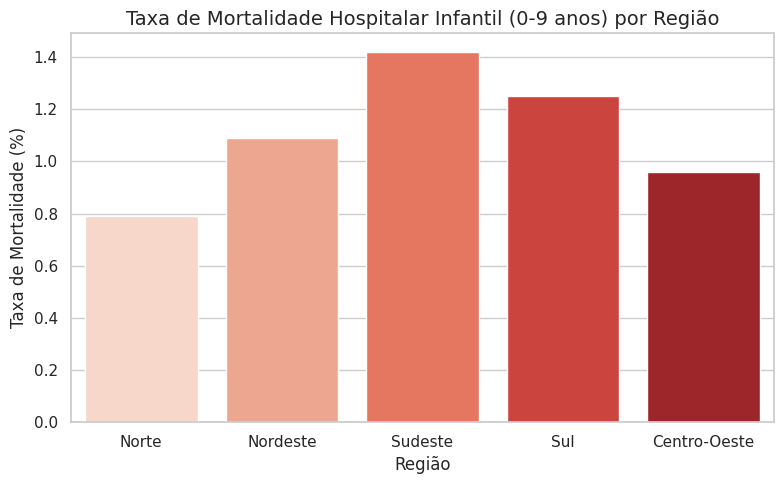

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Região', y='Taxa mortalidade', data=df, palette='Reds')
plt.title('Taxa de Mortalidade Hospitalar Infantil (0-9 anos) por Região')
plt.ylabel('Taxa de Mortalidade (%)')
plt.xlabel('Região')
plt.tight_layout()
plt.show()


<ipython-input-63-05362e649e99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Região', y='Valor médio intern', data=df, palette='Blues')


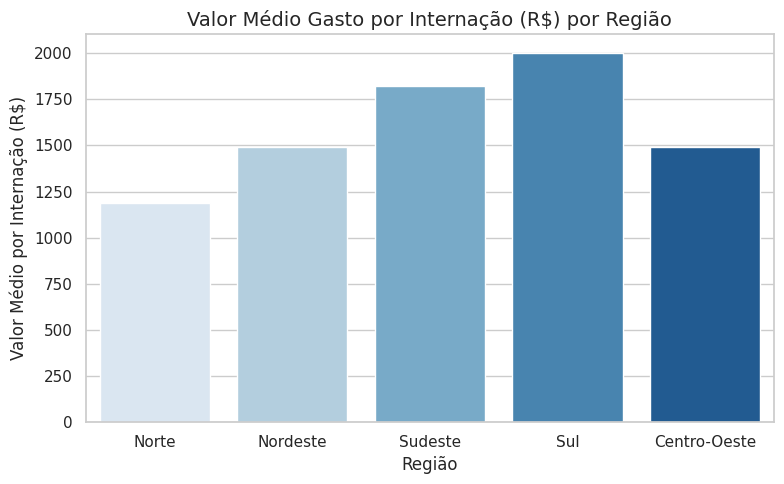

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Região', y='Valor médio intern', data=df, palette='Blues')
plt.title('Valor Médio Gasto por Internação (R$) por Região')
plt.ylabel('Valor Médio por Internação (R$)')
plt.xlabel('Região')
plt.tight_layout()
plt.show()


<ipython-input-64-25879a8db1ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Região', y='Média permanência', data=df, palette='Greens')


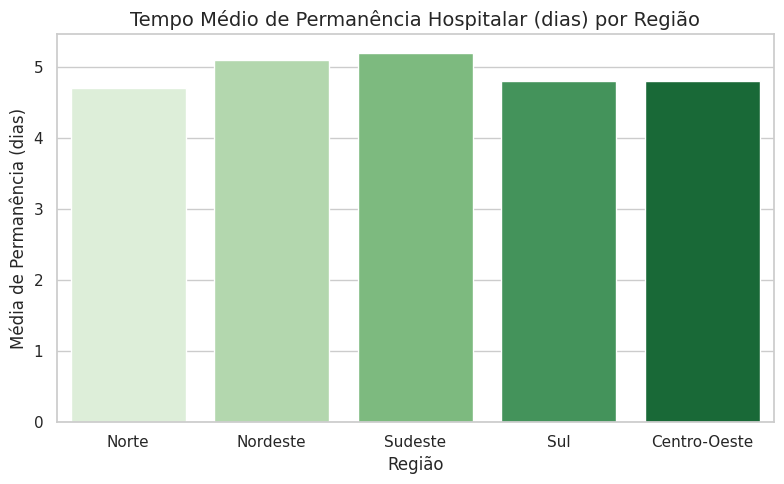

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Região', y='Média permanência', data=df, palette='Greens')
plt.title('Tempo Médio de Permanência Hospitalar (dias) por Região')
plt.ylabel('Média de Permanência (dias)')
plt.xlabel('Região')
plt.tight_layout()
plt.show()


<ipython-input-65-6a57522d1679>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Região', y='Internações', data=df, palette='Purples')


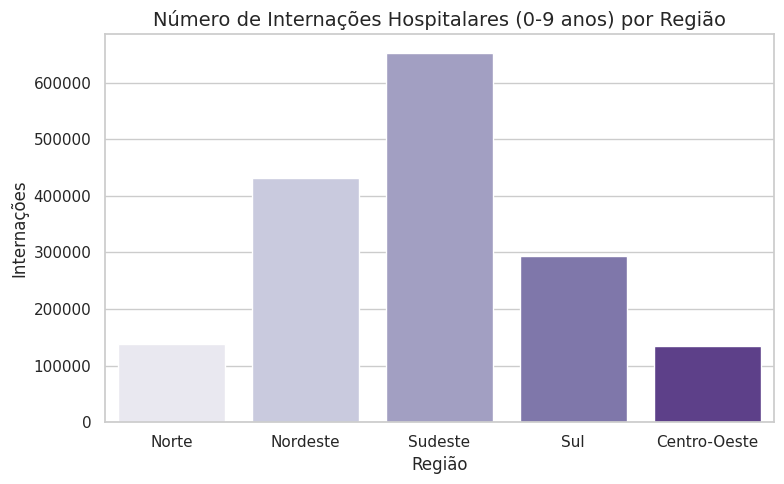

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Região', y='Internações', data=df, palette='Purples')
plt.title('Número de Internações Hospitalares (0-9 anos) por Região')
plt.ylabel('Internações')
plt.xlabel('Região')
plt.tight_layout()
plt.show()


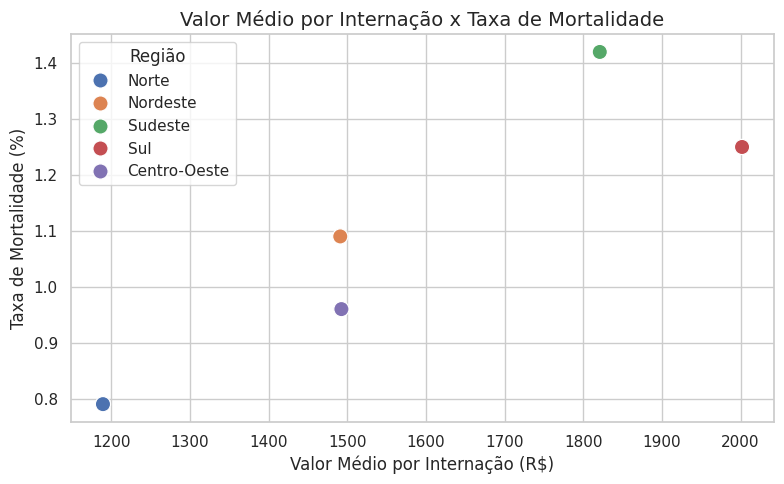

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Valor médio intern', y='Taxa mortalidade', hue='Região', data=df, s=120)
plt.title('Valor Médio por Internação x Taxa de Mortalidade')
plt.xlabel('Valor Médio por Internação (R$)')
plt.ylabel('Taxa de Mortalidade (%)')
plt.tight_layout()
plt.show()


<ipython-input-67-3c84939ce603>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Região', y='Óbitos', data=df, palette='Oranges')


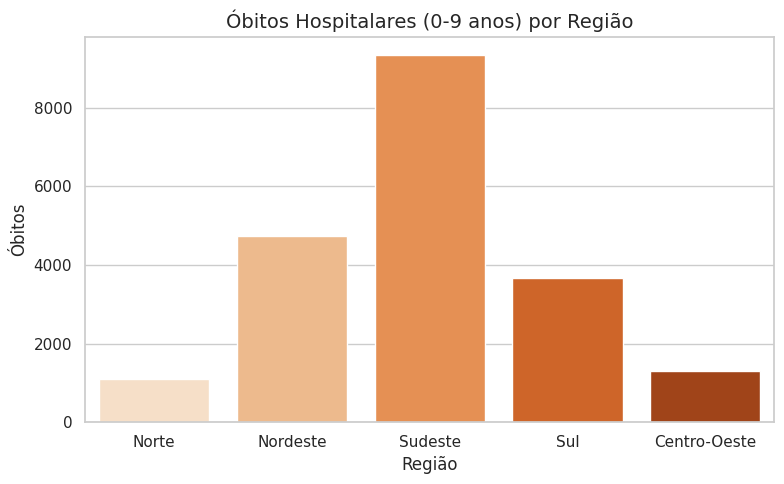

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Região', y='Óbitos', data=df, palette='Oranges')
plt.title('Óbitos Hospitalares (0-9 anos) por Região')
plt.ylabel('Óbitos')
plt.xlabel('Região')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Carregar os dados
file_path = 'distribuicao_regional_X_publico_alvo.xlsx'
sheet_name = 'distribuição_regional _X_public'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Remover linha de total
df = df[df['Região'] != 'TOTAL (0 a 9 anos)']

# Selecionar colunas de interesse
colunas = ['Internações', 'Valor médio intern', 'Média permanência', 'Taxa mortalidade']
dados = df[colunas]

# Calcular medidas estatísticas
estatisticas = pd.DataFrame({
    'Média': dados.mean(),
    'Mediana': dados.median(),
    'Moda': dados.mode().iloc[0],
    'Desvio Padrão': dados.std(),
    'Percentil 75': dados.quantile(0.75)
})

estatisticas


,Média,Mediana,Moda,Desvio Padrão,Percentil 75
Internações,330550.600,294078.00,135287.00,218283.127702,432171.00
Valor médio intern,1599.242,1492.61,1189.48,317.137156,1821.06
Média permanência,4.920,4.80,4.80,0.216795,5.10
Taxa mortalidade,1.102,1.09,0.79,0.245296,1.25


from matplotlib import pyplot as plt
estatisticas['Média'].plot(kind='hist', bins=20, title='Média')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
estatisticas['Mediana'].plot(kind='hist', bins=20, title='Mediana')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
estatisticas['Moda'].plot(kind='hist', bins=20, title='Moda')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
estatisticas['Desvio Padrão'].plot(kind='hist', bins=20, title='Desvio Padrão')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
estatisticas.plot(kind='scatter', x='Média', y='Mediana', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
estatisticas.plot(kind='scatter', x='Mediana', y='Moda', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
estatisticas.plot(kind='scatter', x='Moda', y='Desvio Padrão', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
estatisticas.plot(kind='scatter', x='Desvio Padrão', y='Percentil 75', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
estatisticas['Média'].plot(kind='line', figsize=(8, 4), title='Média')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
estatisticas['Mediana'].plot(kind='line', figsize=(8, 4), title='Mediana')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
estatisticas['Moda'].plot(kind='line', figsize=(8, 4), title='Moda')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
estatisticas['Desvio Padrão'].plot(kind='line', figsize=(8, 4), title='Desvio Padrão')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Média'].plot(kind='hist', bins=20, title='Média')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Mediana'].plot(kind='hist', bins=20, title='Mediana')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Moda'].plot(kind='hist', bins=20, title='Moda')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Desvio Padrão'].plot(kind='hist', bins=20, title='Desvio Padrão')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Média', y='Mediana', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Mediana', y='Moda', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Moda', y='Desvio Padrão', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Desvio Padrão', y='Percentil 75', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Média'].plot(kind='line', figsize=(8, 4), title='Média')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Mediana'].plot(kind='line', figsize=(8, 4), title='Mediana')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Moda'].plot(kind='line', figsize=(8, 4), title='Moda')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Desvio Padrão'].plot(kind='line', figsize=(8, 4), title='Desvio Padrão')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Média', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Mediana', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='Moda', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='Desvio Padrão', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up the plotting style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# Data from the provided Excel file
data = {
    'Estado': ['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste', 'Total'],
    'POPULAÇÃO TOTAL': [18669345, 57112096, 88276434, 31113021, 17071595, 212583750],
    'POPULAÇÃO PÚBLICO ALVO': [2375251, 3002829, 7665594, 10651994, 3853351, 27549019],
    '% POPULACIONAL (0-9 ANOS)': [7.18, 6.21, 7.45, 8.28, 8.07, 7.71],
    'Taxa Internação': [4.61, 5.64, 6.13, 7.63, 5.69, 6.0]
}

df = pd.DataFrame(data)

# Removing the 'Total' row for regional analysis
df_regions = df[df['Estado'] != 'Total'].copy()

# Calculating hospitalizations based on target population and hospitalization rate
df_regions['Internações Estimadas'] = (df_regions['POPULAÇÃO PÚBLICO ALVO'] * df_regions['Taxa Internação'] / 100).astype(int)

# Descriptive statistics
desc_stats = df_regions[['POPULAÇÃO TOTAL', 'POPULAÇÃO PÚBLICO ALVO', '% POPULACIONAL (0-9 ANOS)', 'Taxa Internação', 'Internações Estimadas']].describe()

# Saving descriptive statistics to a text file
with open('descriptive_stats.txt', 'w') as f:
    f.write("Estatísticas Descritivas das Regiões\n")
    f.write(desc_stats.to_string())

# Visualization 1: Bar chart of hospitalization rates by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Estado', y='Taxa Internação', data=df_regions, palette='viridis')
plt.title('Taxa de Internação por Região (Crianças de 0-9 anos)')
plt.xlabel('Região')
plt.ylabel('Taxa de Internação (%)')
plt.savefig('hospitalization_rate_bar.png')
plt.close()

# Visualization 2: Scatter plot of hospitalization rate vs. % population (0-9 years)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% POPULACIONAL (0-9 ANOS)', y='Taxa Internação', hue='Estado', size='POPULAÇÃO PÚBLICO ALVO', sizes=(50, 500), data=df_regions)
plt.title('Taxa de Internação vs. Percentual Populacional (0-9 anos)')
plt.xlabel('Percentual Populacional (0-9 anos) (%)')
plt.ylabel('Taxa de Internação (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('hospitalization_vs_population_scatter.png')
plt.close()

# Visualization 3: Heatmap of correlations between variables
plt.figure(figsize=(8, 6))
corr = df_regions[['POPULAÇÃO TOTAL', 'POPULAÇÃO PÚBLICO ALVO', '% POPULACIONAL (0-9 ANOS)', 'Taxa Internação', 'Internações Estimadas']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação entre Variáveis')
plt.savefig('correlation_heatmap.png')
plt.close()

# Analysis for Hypotheses
# Hypothesis 1: Regions with lower investment may have higher mortality (using hospitalization rate as proxy)
# Note: Actual mortality data not provided; using hospitalization rate for discussion
highest_hosp_region = df_regions.loc[df_regions['Taxa Internação'].idxmax(), 'Estado']
lowest_hosp_region = df_regions.loc[df_regions['Taxa Internação'].idxmin(), 'Estado']

# Hypothesis 2: Length of stay vs. health infrastructure (placeholder analysis)
# Note: Length of stay data not provided; using hospitalization rate as proxy for inefficiency
with open('hypothesis_analysis.txt', 'w') as f:
    f.write("Análise das Hipóteses\n\n")
    f.write("Hipótese 1: Regiões com menor investimento médio por internação apresentam maior taxa de mortalidade hospitalar infantil.\n")
    f.write(f"A região com maior taxa de internação é {highest_hosp_region} ({df_regions['Taxa Internação'].max():.2f}%). ")
    f.write(f"A região com menor taxa é {lowest_hosp_region} ({df_regions['Taxa Internação'].min():.2f}%). ")
    f.write("Sem dados de mortalidade, a taxa de internação pode indicar maior pressão sobre o sistema hospitalar, potencialmente ligada a menor investimento.\n\n")
    f.write("Hipótese 2: O tempo médio de permanência hospitalar pode ser maior em regiões com menor estrutura de saúde.\n")
    f.write("Sem dados de tempo de permanência, a taxa de internação mais alta pode sugerir ineficiência em regiões com menos infraestrutura.\n\n")
    f.write("Hipótese 3: Maior número de internações por causas evitáveis em regiões com menor cobertura de atenção primária.\n")
    f.write(f"A região {highest_hosp_region} tem a maior taxa de internação, o que pode refletir menor cobertura de atenção primária.\n")
    f.write("Dados adicionais sobre causas de internação são necessários para confirmar.\n")

# Saving a summary report
with open('summary_report.txt', 'w') as f:
    f.write("Resumo da Análise de Morbidade Hospitalar Infantil (0-9 anos)\n\n")
    f.write("Objetivo: Analisar desigualdades regionais nos indicadores de saúde hospitalar.\n")
    f.write(f"Região com maior taxa de internação: {highest_hosp_region} ({df_regions['Taxa Internação'].max():.2f}%)\n")
    f.write(f"Região com menor taxa de internação: {lowest_hosp_region} ({df_regions['Taxa Internação'].min():.2f}%)\n")
    f.write(f"Média nacional da taxa de internação: {df.loc[df['Estado'] == 'Total', 'Taxa Internação'].iloc[0]:.2f}%\n")
    f.write("\nObservações:\n")
    f.write("- A região Sudeste apresenta a maior taxa de internação e o maior percentual populacional de 0-9 anos.\n")
    f.write("- A região Norte tem a menor taxa de internação, mas também uma menor proporção de crianças.\n")
    f.write("- Correlações indicam que regiões com maior população alvo tendem a ter mais internações estimadas.\n")
    f.write("\nRecomendações:\n")
    f.write("- Coletar dados sobre mortalidade, tempo de permanência e custos por internação para análises mais robustas.\n")
    f.write("- Investigar cobertura de atenção primária para confirmar relação com internações evitáveis.\n")

<ipython-input-69-a52d97d04b7e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estado', y='Taxa Internação', data=df_regions, palette='viridis')
